# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [916]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [917]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [918]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 46.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 108MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 28.4MB/s]


In [919]:
data = pd.read_csv('./train.csv')

In [920]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Посмореть данные для начала всегда полезно!

In [921]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


Как видно ниже, данные на первый взгляд без пропусков.

In [922]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Проверка на Nan.

In [923]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Есть проблемка - числовые данные в колонке "TotalSpent" в текстовом виде. Далее преобразуем в float. Просто вариант pd.to_numeric(data["TotalSpent"]) не проходит, так как есть пустые строчки вида " ". Их заменяем на нули!


In [924]:
data = data.replace(' ', 0)

In [925]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])

Категориальный признак 'IsSeniorCitizen' принимает числовые значения 0 и 1. Его модифицируем в Yes/No. Далее он будет использоваться в таком виде в CatBoost.

In [926]:
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].replace({1: 'Yes', 0 : 'No'})

Еще проверка! Теперь видим float и oblect, два преобразования прошли без ошибок.

In [927]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   object 
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Далее полезно выполнить проверку на дублирование колонок с данными (параметр 'first' говорит о том, что первая найденная колонка дубликатом не считается:

In [928]:
data.duplicated(keep='first').sum()

14

ниже количество дубликатов без учета колонки target (отток)

In [929]:
data.drop(target_col, axis=1).duplicated(keep='first').sum()

22

Удаляем дубликаты, так как они не очень полезны при дальнейшем обучении модели. Это скорое всего ошибки ввода операторов. Удаляем только вторые и последующие колонки (итого -22 колонки).

In [930]:
data.drop_duplicates(subset=feature_cols, keep='first', inplace=True, ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5260 entries, 0 to 5259
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5260 non-null   int64  
 1   MonthlySpending           5260 non-null   float64
 2   TotalSpent                5260 non-null   float64
 3   Sex                       5260 non-null   object 
 4   IsSeniorCitizen           5260 non-null   object 
 5   HasPartner                5260 non-null   object 
 6   HasChild                  5260 non-null   object 
 7   HasPhoneService           5260 non-null   object 
 8   HasMultiplePhoneNumbers   5260 non-null   object 
 9   HasInternetService        5260 non-null   object 
 10  HasOnlineSecurityService  5260 non-null   object 
 11  HasOnlineBackup           5260 non-null   object 
 12  HasDeviceProtection       5260 non-null   object 
 13  HasTechSupportAccess      5260 non-null   object 
 14  HasOnlin

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Выведем гистограммы с численными признаками.

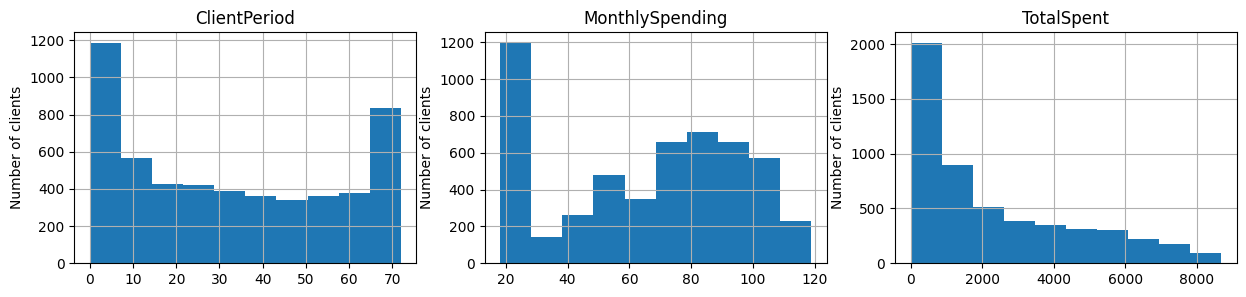

In [931]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
for ax, col in zip(axes.flatten(), data[num_cols].columns):
  ax.set_title(col)
  ax.set_ylabel("Number of clients")
  data[col].hist(ax=ax)


Выведем диаграммы с распределением категориальных признаков (заодно еще проверим адекватность данных и отсутствие ошибок в них).

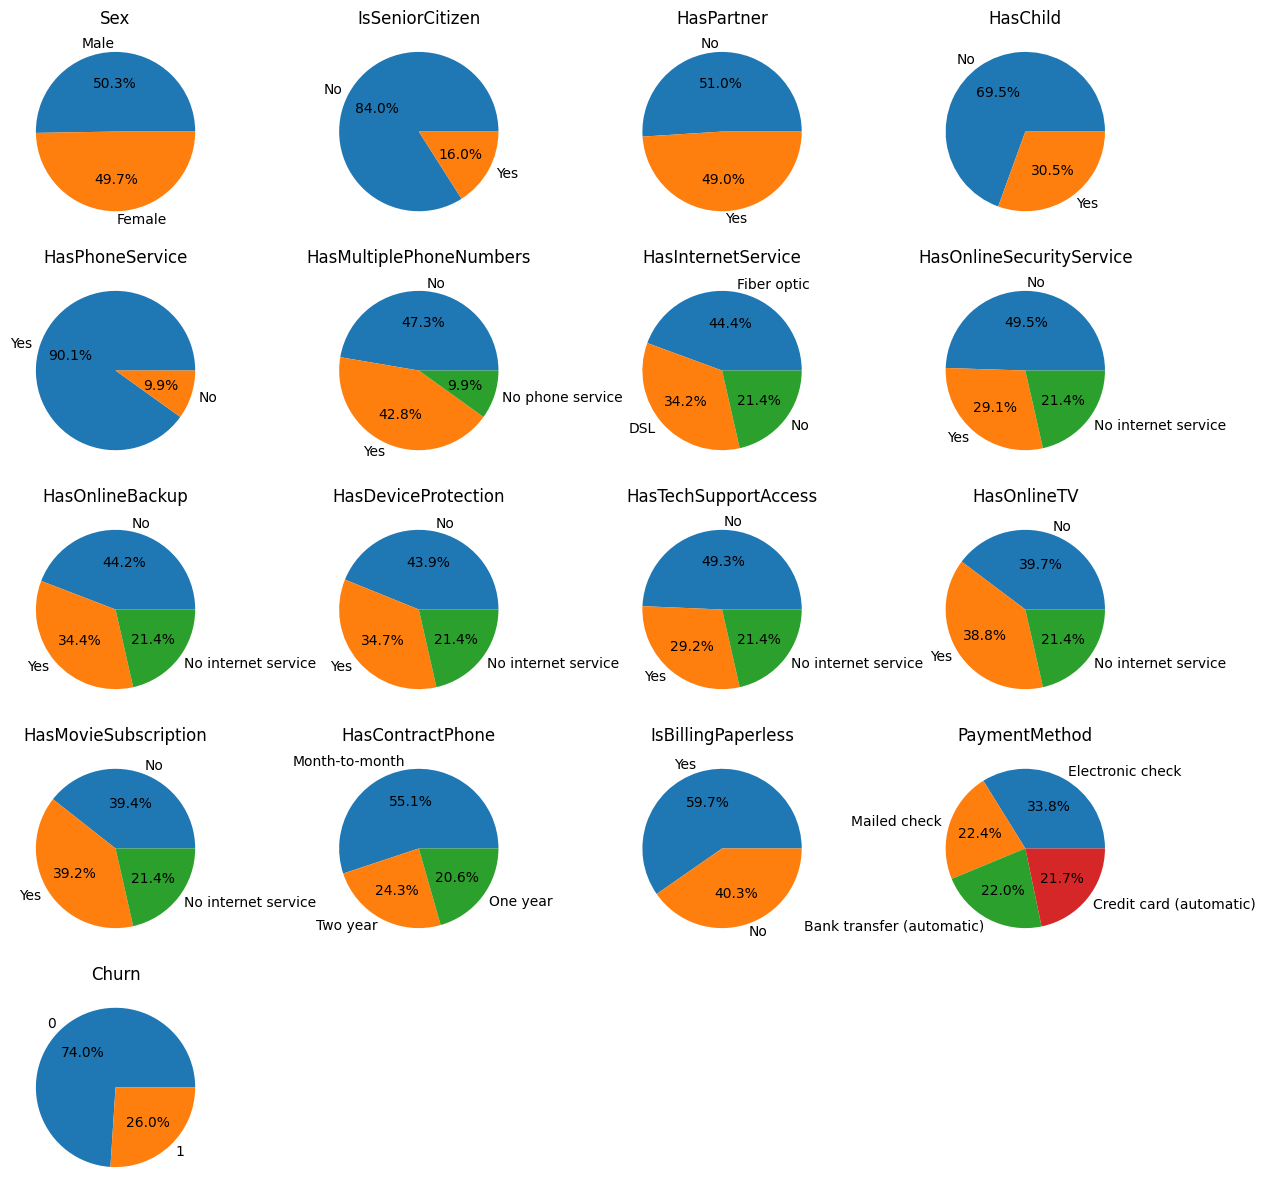

In [932]:
fig, axes = plt.subplots(5, 4, figsize=(15, 15))
for ax, col in zip(axes.flatten(), data[cat_cols + [target_col]].columns):
  ax.set_title(col)
  ax.pie(data[col].value_counts(), autopct="%1.1f%%", labels=data[col].value_counts().index)
for i in [17, 18, 19]:
  fig.delaxes(axes.flatten()[i])


С учетом последней диаграммы классы можно считать сбалансированными. Для оттока значение ~25% вполне адекватно.

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

No internet service в данных по наблюдениям означает фактически тоже самое, что и No. Понятно, что определенные сервисы невозможно предоставлять без интернета.
Аналогично в одном признаке "No phone service" - это тоже "No". Исправим ниже:

In [933]:
data = data.replace({"No internet service": "No", "No phone service": "No"})

Выше можно перезапустить построение круговых диаграмм и проверить результат.
Других проблем с данными не выявлено.


Все вышеперечисленные действия лучше оставить в виде функции на будущее: функция ниже удаляет из данных пробелы, числовую переменную 'TotalSpent' преобразует из str во float, категориальную переменную 'IsSeniorCitizen' из численной в 'Yes/No' . Заменяет различные варианты "No ..." на просто 'No'. При вызове с параметром drop_duplicates True также удаляет дубликаты строк, при этом оставляя по одной строке. После такой предобработки данные уже можно передавать CatBoost.

In [934]:
def data_preprocessing(data, drop_duplicates = False):

  data = data.replace(' ', 0)
  data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])
  data['IsSeniorCitizen'] = data['IsSeniorCitizen'].replace({1: 'Yes', 0 : 'No'})
  data = data.replace({"No internet service": "No", "No phone service": "No"})
  if drop_duplicates:
    data.drop_duplicates(subset=feature_cols, keep='first', inplace=True, ignore_index=True)

  return data

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

Делаем перекодировку в числа для категориальных переменных. Категориальные признаки кодируются теперь цифрами 0,1,2,3 ... . Копию оригинальных данных оставим в data_origin для CatBoost, который умеет с ними работать без преобразований.

In [935]:
data_origin = data[:]

Категориальные переменные заменяем на численные данные (можно делать Label, можно OneHot кодирование). Здесь сделан второй вариант:

OneHotEncoder далее делает из категориальных по сути бинарные признаки.

In [936]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
ohe_data = pd.DataFrame(onehotencoder.fit_transform(data[cat_cols]).toarray())

Добавляем к данным версию onehot категориальных признаков (еще их лучше конвертировать в формат int, а не оставлять float).

In [937]:
data = data.join(ohe_data.astype(int))

Названия новых категориальных признаков должны быть строковыми для дальнейшей работы:

In [938]:
data.columns = data.columns.astype(str)

Исходные категориальные колонки удаляем.

In [939]:
data.drop(cat_cols, axis= 1, inplace=True)

Всю перекодировку на будущее (преобразование X_test и дальнейшие эксперименты) полезно оставить в виде функции!

In [940]:
def CatOneHotEncoder(data):
  onehotencoder = OneHotEncoder()
  ohe_data = pd.DataFrame(onehotencoder.fit_transform(data[cat_cols]).toarray())
  data = data.join(ohe_data.astype(int))
  data.columns = data.columns.astype(str)
  data.drop(cat_cols, axis= 1, inplace=True)
  return data

In [941]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5260 entries, 0 to 5259
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     5260 non-null   int64  
 1   MonthlySpending  5260 non-null   float64
 2   TotalSpent       5260 non-null   float64
 3   Churn            5260 non-null   int64  
 4   0                5260 non-null   int64  
 5   1                5260 non-null   int64  
 6   2                5260 non-null   int64  
 7   3                5260 non-null   int64  
 8   4                5260 non-null   int64  
 9   5                5260 non-null   int64  
 10  6                5260 non-null   int64  
 11  7                5260 non-null   int64  
 12  8                5260 non-null   int64  
 13  9                5260 non-null   int64  
 14  10               5260 non-null   int64  
 15  11               5260 non-null   int64  
 16  12               5260 non-null   int64  
 17  13            

Проверка содержимого data после перекодировки. Появилось вместо исходных категориальных 36 штук новых колонок. Можно их при желании переименовать, но на результаты это никак не повлияет.

Данные практически готовы для тестов и обучения моделей.
Главное - не забыть исключить target колонку из Х, иначе будем радоваться результатам score в 99,9%:)

In [942]:
y = data[target_col]
X = data.drop(target_col, axis= 1)

In [943]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

Разбиваем данные на тренировочную и тестовую части. Не забываем провести нормировку парметров (StandardScaler в pipeline)!

In [944]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [945]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,
                                                    train_size=0.8,
                                                    random_state=13)

Первая попытка с помощью логистической регрессии. Результаты на тернировочной и тестовой выборке неплохие (в начале тренировочная выборка 80%, потом тестовая 20%):

In [946]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [947]:
roc_auc_score(y_train, pipe.predict_proba(X_train)[:, 1]), roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1])

(0.8506499356499357, 0.8408276241887317)

Проверим далее логистическую регрессию с кросс-валидацией и уже на всем массиве X без разделения. Результаты похожие - около 85%.

In [948]:
pipe = make_pipeline(StandardScaler(), LogisticRegressionCV(cv=5, scoring='roc_auc', refit=True))
pipe.fit(X, y)
roc_auc_score(y, pipe.predict_proba(X)[:, 1])

0.8491957334817155

Попробуем поискать оптимальные параметры с помощью GreedSearch для LogisticRegression. В поиск помимо коэффициента C включим параметр "model__penalty", который отвечает за регуляризацию. Для solver лучше использовать "saga", так как в документации указано, что он работает со всеми вариантами регуляризации:

In [949]:
parameters = {
    "model__C": [3.295], #np.arange(3.290, 3.300, 0.001)
    "model__penalty": ['l2'] #['l1', 'l2']
}

Немного другой вариант pipeline из sklearn:

In [950]:
from sklearn.pipeline import Pipeline

In [951]:
pipe_lgr = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(solver="saga", max_iter=1000, random_state=13))
])

In [952]:
lgr_model = GridSearchCV(estimator= pipe_lgr,
                     param_grid=parameters,
                     cv=5,
                     scoring='roc_auc',
                     n_jobs=-1
                     )
lgr_model.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=13,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'model__C': [3.295], 'model__penalty': ['l2']},
             scoring='roc_auc')

In [953]:
lgr_model.best_params_

{'model__C': 3.295, 'model__penalty': 'l2'}

In [954]:
roc_auc_score(y, lgr_model.predict_proba(X)[:, 1])

0.8491653211068078

best params: {'model__C': 3.295, 'model__penalty': 'l2'} ROC_AUC score: 0.8491653211068078, Kaggle score: 0.84595

Выше качество логистической регрессии с оптимальными параметрами, которые удалось подобрать. Для регрессии результат неплохой. Количество итераций пришлось увеличить, чтобы не достигался предел. Score на Kaggle (тестовая выборка) немного ниже, чем на train.


Дополнительный тест на RandomForest с подбором параметров по сетке:

In [955]:
from sklearn.ensemble import RandomForestRegressor

In [956]:
parameters = {
    "min_samples_split": [3], #np.arange(2, 20, 1)
    "min_samples_leaf": [10] #np.arange(2, 20, 1)
}
rf = RandomForestRegressor(n_estimators=200, random_state=13, n_jobs=-1)
rf_model = GridSearchCV(estimator=rf,
                           param_grid=parameters,
                           cv=5,
                           scoring='roc_auc',
                           n_jobs=-1)
rf_model.fit(X, y);

In [957]:
rf_model.best_params_

{'min_samples_leaf': 10, 'min_samples_split': 3}

In [958]:
roc_auc_score(y, rf_model.predict(X))

0.9288643287059591

Best params: {'min_samples_leaf': 10, 'min_samples_split': 3}
ROC_AUC score: 0.929 (данные для "леса" могут "плавать"), Kaggle score: 0.851

Получился очень высокий результат с явным "переобучением" модели, однако на тестовых данных на Kaggle тоже неплохо - удалось перепрыгнуть 85%.

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [959]:
!pip install catboost

In [960]:
import catboost

Берем данные до обработки категриальных переменных (не забываем удалить target из X!):

In [961]:
X = data_origin.drop(target_col, axis= 1)
y = data_origin[target_col]

In [962]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=13)

In [963]:
cb_model = catboost.CatBoostClassifier(cat_features=cat_cols,
                                       logging_level="Silent",
                                       random_seed=13,
                                       eval_metric='AUC',
                                       )

cb_model.fit(X_train, y_train)
roc_auc_score(y_train, cb_model.predict_proba(X_train)[:, 1]), roc_auc_score(y_test, cb_model.predict_proba(X_test)[:, 1])

(0.9111919386919387, 0.8407706514359508)

Первый результат не очень хороший, его даже нет смысла запускать на Kaggle. Однако он сразу без подбора параметров дает score выше 84%.

Далее предложено протестировать различные значения параметров iterations и learning_rate. Я попробовал и другие параметры:

In [964]:
cb_model = catboost.CatBoostClassifier(cat_features=cat_cols,
                                       logging_level="Silent",
                                       eval_metric='AUC',
                                       random_seed=13,
                                       iterations=250,
                                       learning_rate=0.05,
                                       min_data_in_leaf=110,
                                       max_depth=4,
                                       random_strength=5,
                                       )

cb_model.fit(X_train, y_train)
roc_auc_score(y_train, cb_model.predict_proba(X_train)[:, 1]), roc_auc_score(y_test, cb_model.predict_proba(X_test)[:, 1])

(0.8625652275652276, 0.8481842308915761)

Небольшой подбор параметров уже приблизил результат к 85% (на тесте).

Финальное обучение проводим на полном наборе данных X.

In [965]:
cb_model.fit(X, y)
roc_auc_score(y, cb_model.predict_proba(X)[:, 1])

0.8596741107524829

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить:

Catboost выдал самое лучшее качество после подбора параметров на тесте - 0.8481842308915761.

Kaggle score: 0.85299. Нормальный результат.

На этом можно закончить, так как дальнейшие улучшения уже требуют более сложных моделей и веcьма длительного и тщательного подбора параметров. Лучшее, что мне удалось мне получить  - это catboost 0.85381 на Kaggle. Там применялось OneHot кодирование категориальных признаков, что видимо дает слегка лучшие результаты.  

# Предсказания

In [966]:
#X_test = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/test.csv')
#submission = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/submission.csv')
##X_test = data_preprocessing(X_test)
#submission['Churn'] = cb_model.predict_proba(X_test)[:, 1]
#submission.to_csv('submission.csv',index=False)

Лучшее решение отправьте в Stepik.